# 데이터 정제

데이터는 2013-01-01 부터 2017-08-15 까지 있음

In [21]:
import pandas as pd
data = pd.read_csv('./../data/sales_raw.csv')

data = data[['date','store_nbr','family','sales']]
data.columns = ['ds', 'store_id', 'product_id', 'y']

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['product_id'] = encoder.fit_transform(data['product_id'])
data['ds'] = pd.to_datetime(data['ds'], infer_datetime_format=True)
data.to_csv('./../data/sales_modified.csv')

In [6]:
import pandas as pd

data = pd.read_csv('./../data/sales_modified2.csv', index_col=0)
data = data[(data['store_id'] == 1) & (data['product_id'] == 3)]
data

,Unnamed: 0,ds,store_id,product_id,y
3,3,2017-10-26,1,3,0.0
1785,1785,2017-10-27,1,3,1091.0
3567,3567,2017-10-28,1,3,919.0
5349,5349,2017-10-29,1,3,953.0
7131,7131,2017-10-30,1,3,1160.0
...,...,...,...,...,...
2991981,2991981,2022-06-05,1,3,1006.0
2993763,2993763,2022-06-06,1,3,1659.0
2995545,2995545,2022-06-07,1,3,803.0
2997327,2997327,2022-06-08,1,3,2201.0


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -25.213
             ds
0    2017-10-26
1    2017-10-27
2    2017-10-28
3    2017-10-29
4    2017-10-30
...         ...
1686 2022-06-12
1687 2022-06-13
1688 2022-06-14
1689 2022-06-15
1690 2022-06-16

[1691 rows x 1 columns]
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3356.71     0.0104027       84.9716           1           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3359.17   0.000505273       63.5006           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       3359.58   0.000211358       79.3544   1.432e-06       0.001      326  LS failed, Hessian reset 
     289       3359.81   6.25467e-07       74.3268           1           1      422   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below

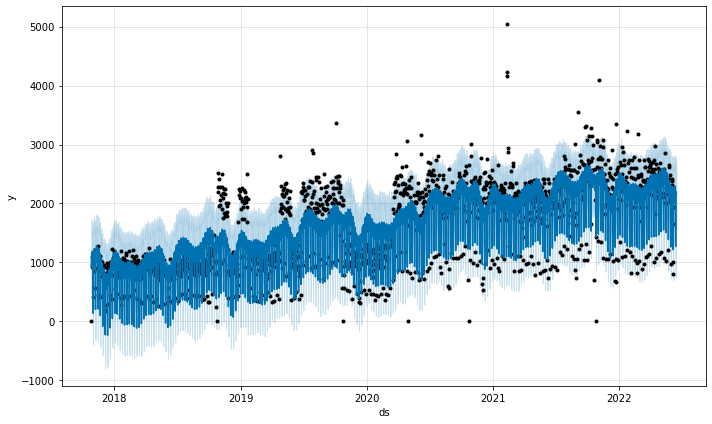

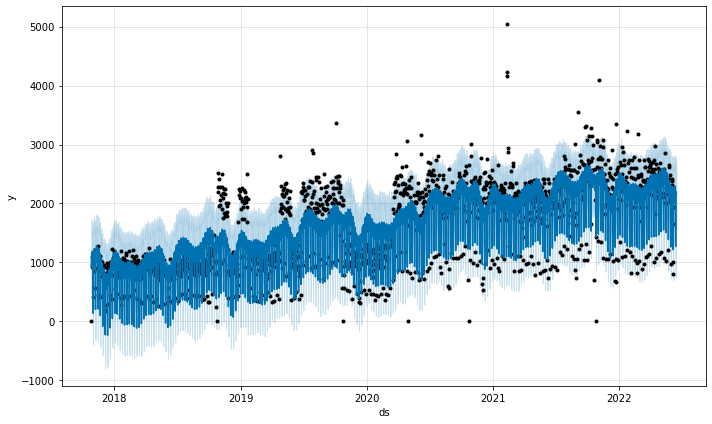

In [7]:
from prophet import Prophet

prophet = Prophet()
prophet.fit(data)

future = prophet.make_future_dataframe(periods=7, freq='D',include_history=True)
print(future)
forecast = prophet.predict(future)
# print(forecast[['ds', 'yhat','yhat_lower','yhat_upper']])
print(forecast)
print(sum(forecast['yhat']))
prophet.plot(forecast)

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


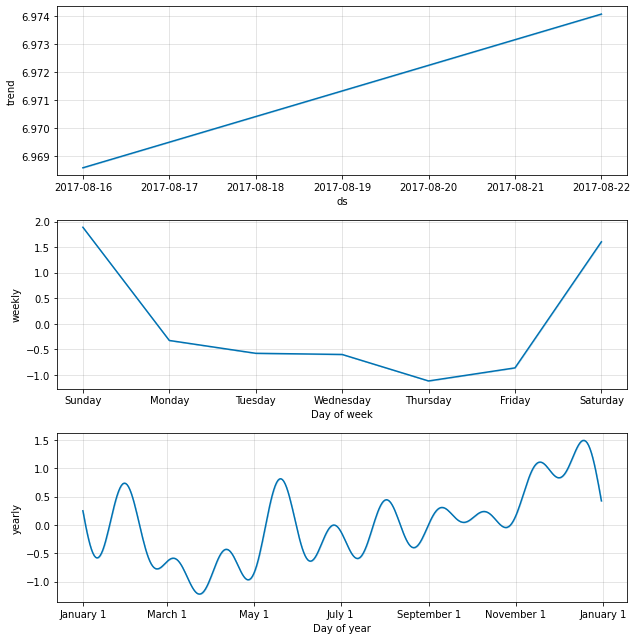

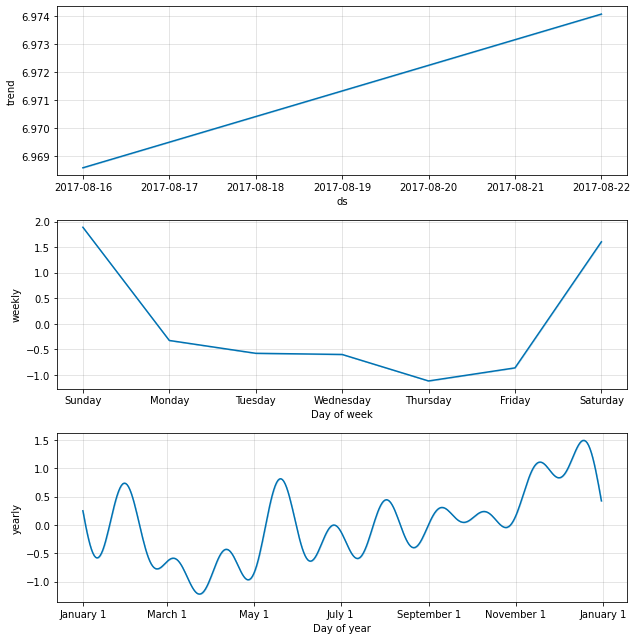

In [9]:
prophet.plot_components(forecast)